In [1]:
from collections import OrderedDict
import re
import os

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import torch
from tqdm.notebook import tqdm

from eval import get_run_metrics, read_run_dir, get_model_from_run
from plot_utils import basic_plot, collect_results, relevant_model_names

%matplotlib inline
%load_ext autoreload
%autoreload 2

sns.set_theme('notebook', 'darkgrid')
palette = sns.color_palette('colorblind')

run_dir = "../models"

In [2]:
df = read_run_dir(run_dir)
df  # list all the runs in our run_dir

KeyError: (8, 8)

In [ ]:
"""
in our case, use linear regression
"""

task = "linear_regression" 
#task = "sparse_linear_regression"
#task = "decision_tree"
#task = "relu_2nn_regression"

"""
Replace run_id
"""
run_id = "mlp_dim10_l12_n512"  # if you train more models, replace with the run_id from the table above

run_path = os.path.join(run_dir, task, run_id)
recompute_metrics = False

if recompute_metrics:
    get_run_metrics(run_path)  # these are normally precomputed at the end of training

# Plot pre-computed metrics

mlp_dim10_l12_n512 mlp_dim10_l12_n512


100%|██████████| 15/15 [00:00<00:00, 213995.10it/s]

DEBUG: models ['MLP', 'Least Squares', '3-Nearest Neighbors', 'Averaging']
DEBUG: metrics {'MLP': {'mean': [1.0208106994628907, 1.0389631271362305, 1.0117490768432618, 1.0165950775146484, 1.0415313720703125, 1.0368026733398437, 0.986213207244873, 0.9333981513977051, 1.0229227066040039, 1.0149067878723144, 1.004636573791504, 1.0458971977233886, 0.9890276908874511, 1.0799179077148438, 1.0501981735229493, 1.0231508255004882, 0.9703592300415039, 0.9510354995727539, 0.9138917922973633, 0.9330562591552735, 1.0947999954223633], 'std': [1.8379703521728517, 1.6523004531860352, 1.56498441696167, 1.5897863388061524, 1.696756362915039, 1.637394332885742, 1.5425359725952148, 1.5519961357116698, 1.562184715270996, 1.7937200546264649, 1.6811639785766601, 1.7038143157958985, 1.624061393737793, 1.6562486648559571, 1.745185661315918, 1.7341524124145509, 1.7436334609985351, 1.5271550178527833, 1.4546701431274414, 1.5884834289550782, 1.7397605895996093], 'bootstrap_low': [0.9397036552429199, 0.96256704330

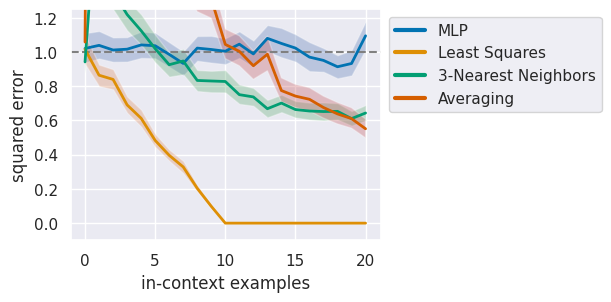

In [ ]:
def valid_row(r):
    return r.task == task and r.run_id == run_id

metrics = collect_results(run_dir, df, valid_row=valid_row)
_, conf = get_model_from_run(run_path, only_conf=True)
n_dims = conf.model.n_dims

models = relevant_model_names[task]
basic_plot(metrics["standard"], models=models)
plt.show()

DEBUG: models ['MLP', 'Least Squares', '3-Nearest Neighbors', 'Averaging']
DEBUG: metrics {'MLP': {'mean': [0.9031017303466797, 0.9777587890625, 1.0182639122009278, 1.017953586578369, 0.976500129699707, 1.0025778770446778, 0.9753743171691894, 0.9632492065429688, 0.9899691581726074, 0.9885085105895997, 0.9713534355163574, 0.9845635414123535, 1.0330589294433594, 0.9310136795043945, 1.0184415817260741, 1.0006818771362305, 0.9637407302856446, 0.9498174667358399, 0.991697120666504, 1.0306440353393556, 0.9774577140808105], 'std': [1.5101153373718261, 1.7927743911743164, 1.8819145202636718, 1.6740119934082032, 1.7310792922973632, 1.664717674255371, 1.9251739501953125, 1.546696090698242, 1.7741382598876954, 1.8792831420898437, 1.7008533477783203, 1.7096220016479493, 1.8282833099365234, 1.7040981292724608, 1.7234453201293944, 1.903409194946289, 1.8404205322265625, 1.6143077850341796, 1.6976444244384765, 1.8312618255615234, 1.9502182006835938], 'bootstrap_low': [0.8375218391418457, 0.90027627944

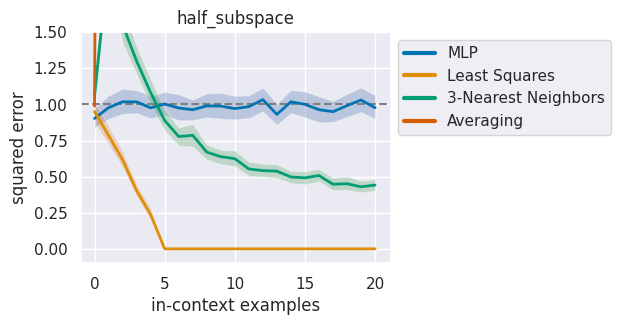

DEBUG: models ['MLP', 'Least Squares', '3-Nearest Neighbors', 'Averaging']
DEBUG: metrics {'MLP': {'mean': [1.0234210014343261, 1.0171806335449218, 0.9768452644348145, 1.0349594116210938, 0.9621489524841309, 1.0379178047180175, 1.0019282341003417, 0.9353002548217774, 1.047266387939453, 1.0301416397094727, 1.0493125915527344, 1.0373924255371094, 0.9467672348022461, 0.9990694046020507, 0.9750080108642578, 1.0363580703735351, 0.9177791595458984, 0.978373908996582, 0.9994829177856446, 0.9540194511413574, 1.0441121101379394], 'std': [1.5922908782958984, 1.576869297027588, 1.6131853103637694, 1.6492935180664063, 1.4507168769836425, 1.5054927825927735, 1.5154291152954102, 1.3943020820617675, 1.6932205200195312, 1.712755012512207, 1.5994439125061035, 1.7139167785644531, 1.5609954833984374, 1.6048728942871093, 1.5459036827087402, 1.6246187210083007, 1.4086053848266602, 1.5716049194335937, 1.5331644058227538, 1.4691704750061034, 1.716033935546875], 'bootstrap_low': [0.9512055397033692, 0.9451756

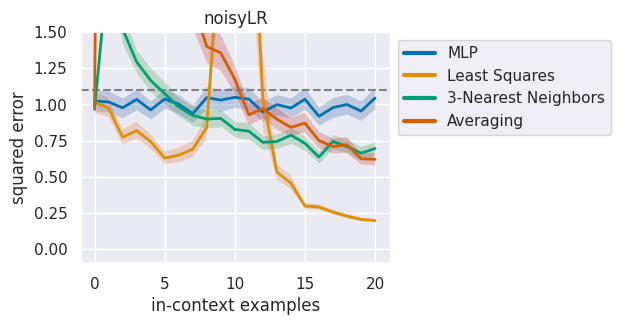

DEBUG: models ['MLP', 'Least Squares', '3-Nearest Neighbors', 'Averaging']
DEBUG: metrics {'MLP': {'mean': [0.9503495216369628, 1.0037545204162597, 0.963017463684082, 0.9867223739624024, 0.9363892555236817, 0.9762521743774414, 0.938234519958496, 0.995451831817627, 1.0142065048217774, 0.9849065780639649, 3.024120451300405e-06, 3.024120451300405e-06, 3.024120451300405e-06, 3.024120451300405e-06, 3.024120451300405e-06, 3.024120451300405e-06, 3.024120451300405e-06, 3.024120451300405e-06, 3.024120451300405e-06, 3.024120451300405e-06, 3.024120451300405e-06], 'std': [1.486434555053711, 1.489974594116211, 1.491860294342041, 1.462099838256836, 1.5801115036010742, 1.62249698638916, 1.4701887130737306, 1.6338048934936524, 1.5120967864990233, 1.4930378913879394, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'bootstrap_low': [0.8844633102416992, 0.9351903915405273, 0.8991462707519531, 0.9228174209594726, 0.8639837265014648, 0.9016352653503418, 0.8662714004516602, 0.9194263458251953, 0.951

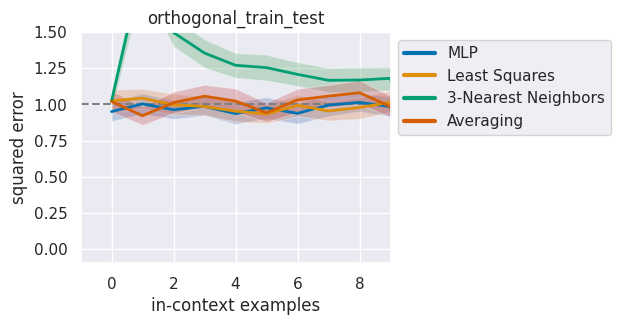

DEBUG: models ['MLP', 'Least Squares', '3-Nearest Neighbors', 'Averaging']
DEBUG: metrics {'MLP': {'mean': [1.0251787185668946, 1.0251787185668946, 1.0504750251770019, 0.9537191390991211, 0.9478747367858886, 1.0071806907653809, 1.0717907905578614, 1.026216411590576, 1.0418498039245605, 1.0848520278930665, 0.9209405899047851, 1.0633064270019532, 1.00091495513916, 0.9884325981140136, 1.0167694091796875, 1.0142465591430665, 0.9618093490600585, 0.9628458976745605, 1.0109301567077638, 1.0236432075500488, 1.0072237968444824], 'std': [1.6088695526123047, 1.6088695526123047, 1.6356626510620118, 1.4481348037719726, 1.595452117919922, 1.7120311737060547, 1.8651800155639648, 1.6235763549804687, 1.5884915351867677, 1.7241687774658203, 1.3152628898620606, 1.7670434951782226, 1.4558541297912597, 1.580538272857666, 1.7994609832763673, 1.623583984375, 1.4951141357421875, 1.400393581390381, 1.8275049209594727, 1.6068964004516602, 1.57769775390625], 'bootstrap_low': [0.9580587387084961, 0.95805873870849

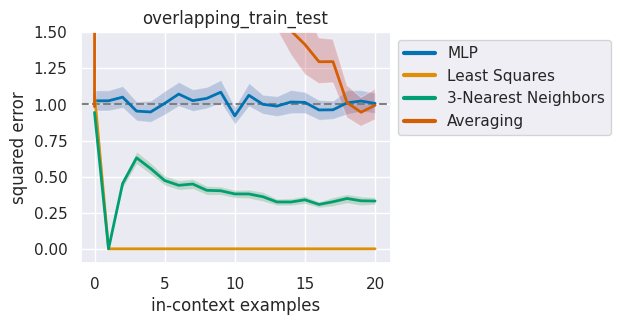

DEBUG: models ['MLP', 'Least Squares', '3-Nearest Neighbors', 'Averaging']
DEBUG: metrics {'MLP': {'mean': [0.9903665542602539, 1.0092738151550293, 1.0273198127746581, 1.082047939300537, 0.9956197738647461, 0.9711410522460937, 0.9809167861938477, 0.9734460830688476, 0.9356837272644043, 1.0151769638061523, 0.9566617965698242, 0.96085205078125, 1.1043729782104492, 1.0055334091186523, 0.9946611404418946, 0.9016683578491211, 0.9923002243041992, 1.0114794731140138, 1.0464605331420898, 0.9479581832885742, 1.0124984741210938], 'std': [1.48661470413208, 1.5063371658325195, 1.732670211791992, 1.7514198303222657, 1.5354574203491211, 1.5815119743347168, 1.7663150787353517, 1.539620304107666, 1.4330904960632325, 1.5937558174133302, 1.5302133560180664, 1.5272878646850585, 1.9132476806640626, 1.6645753860473633, 1.5431177139282226, 1.4164779663085938, 1.6775825500488282, 1.5421642303466796, 1.7212310791015626, 1.4754404067993163, 1.542349147796631], 'bootstrap_low': [0.9277687072753906, 0.9380838394

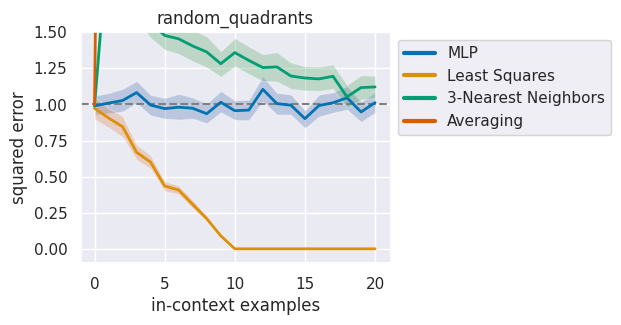

DEBUG: models ['MLP', 'Least Squares', '3-Nearest Neighbors', 'Averaging']
DEBUG: metrics {'MLP': {'mean': [0.11466830968856812, 0.11730191707611085, 0.11049705743789673, 0.11035369634628296, 0.11428501605987548, 0.11654603481292725, 0.10437935590744019, 0.10696566104888916, 0.11175415515899659, 0.11177170276641846, 0.12043484449386596, 0.11668004989624023, 0.11621310710906982, 0.1150325059890747, 0.11954667568206787, 0.11222021579742432, 0.10843813419342041, 0.11425443887710571, 0.10998830795288086, 0.11450350284576416, 0.10941416025161743], 'std': [0.18892067670822144, 0.1759255886077881, 0.2072542428970337, 0.18119848966598512, 0.18864456415176392, 0.18257603645324708, 0.17413848638534546, 0.16963165998458862, 0.19598195552825928, 0.18237777948379516, 0.21181201934814453, 0.1885467529296875, 0.19520460367202758, 0.18051497936248778, 0.19276199340820313, 0.19398010969161988, 0.16497062444686889, 0.19594098329544068, 0.18848154544830323, 0.18093827962875367, 0.17285101413726806], 'boo

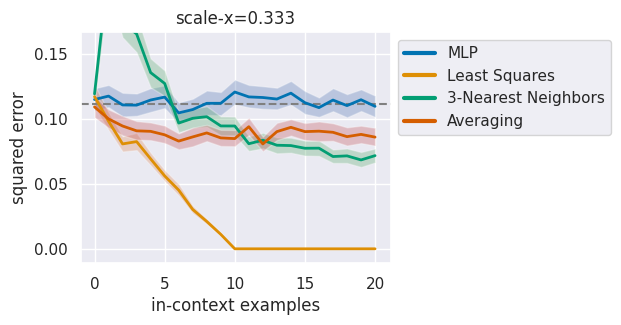

DEBUG: models ['MLP', 'Least Squares', '3-Nearest Neighbors', 'Averaging']
DEBUG: metrics {'MLP': {'mean': [0.2384960651397705, 0.23784728050231935, 0.24128003120422364, 0.2390214204788208, 0.23029587268829346, 0.253414249420166, 0.2494300365447998, 0.24377071857452393, 0.24346778392791749, 0.2517829418182373, 0.25046112537384035, 0.24912843704223633, 0.24115147590637206, 0.2579714298248291, 0.24970359802246095, 0.24160778522491455, 0.27001042366027833, 0.25221734046936034, 0.25037636756896975, 0.2268648624420166, 0.25462653636932375], 'std': [0.3574267864227295, 0.3755029678344727, 0.35126752853393556, 0.43121991157531736, 0.3569190502166748, 0.45866050720214846, 0.39905762672424316, 0.38410534858703616, 0.39683284759521487, 0.39335768222808837, 0.38521053791046145, 0.40575356483459474, 0.36880764961242674, 0.4174500942230225, 0.41440744400024415, 0.40006294250488283, 0.45145082473754883, 0.41710715293884276, 0.38906517028808596, 0.327790641784668, 0.4002834796905518], 'bootstrap_low'

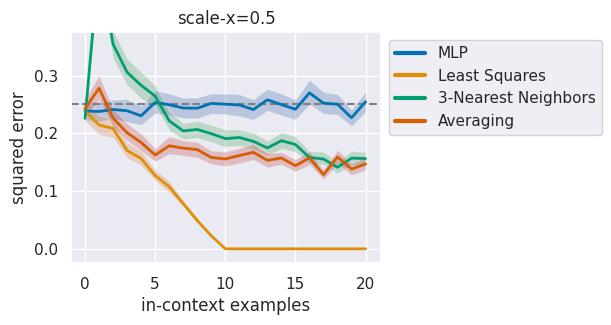

DEBUG: models ['MLP', 'Least Squares', '3-Nearest Neighbors', 'Averaging']
DEBUG: metrics {'MLP': {'mean': [3.9323585510253904, 4.146850967407227, 4.007266998291016, 4.25128173828125, 4.108817291259766, 3.9977928161621095, 4.0091911315917965, 3.880474853515625, 3.9703952789306642, 3.8990455627441407, 4.0436767578125, 3.871852493286133, 3.945642852783203, 4.180873870849609, 3.9226139068603514, 3.5922573089599608, 4.194145965576172, 3.948935699462891, 4.1571308135986325, 3.828057861328125, 3.952367401123047], 'std': [7.254673004150391, 6.541398620605468, 6.577388763427734, 6.77664794921875, 6.410105133056641, 6.0828086853027346, 6.15984992980957, 6.1535194396972654, 6.0046344757080075, 7.220955657958984, 6.9942466735839846, 5.940459060668945, 6.294731903076172, 6.673970031738281, 6.440411376953125, 5.4880531311035154, 6.557393646240234, 6.101029586791992, 6.862431335449219, 5.748945617675782, 6.525362396240235], 'bootstrap_low': [3.5998504638671873, 3.861601638793945, 3.717185211181641, 

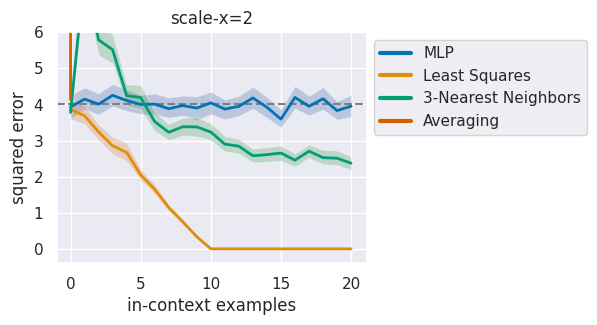

DEBUG: models ['MLP', 'Least Squares', '3-Nearest Neighbors', 'Averaging']
DEBUG: metrics {'MLP': {'mean': [8.522857666015625, 9.291690826416016, 9.583424377441407, 9.882875061035156, 8.754835510253907, 8.693333435058594, 8.730051422119141, 9.20656967163086, 9.009878540039063, 8.99322738647461, 9.132278442382812, 9.565371704101562, 9.411014556884766, 8.494287109375, 8.896495819091797, 9.006256103515625, 9.21917266845703, 9.847554016113282, 9.555714416503907, 8.30591049194336, 8.796976470947266], 'std': [12.922966003417969, 14.834555053710938, 15.955319213867188, 16.108474731445312, 14.14191131591797, 13.392919921875, 13.534323120117188, 14.61236114501953, 13.827914428710937, 14.706382751464844, 16.436160278320312, 15.810040283203126, 18.6548828125, 13.893861389160156, 15.089195251464844, 13.781881713867188, 13.788040161132812, 16.346406555175783, 16.66039123535156, 12.715139007568359, 13.337892150878906], 'bootstrap_low': [7.931980133056641, 8.59615478515625, 8.859660339355468, 9.19029

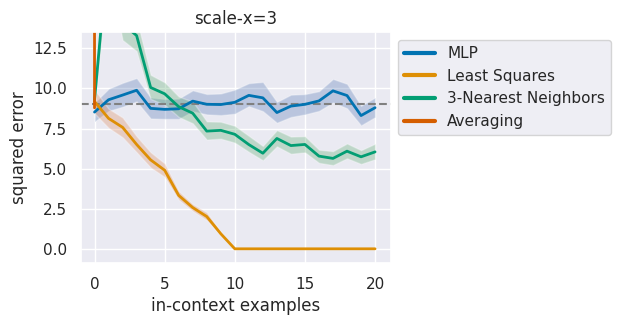

DEBUG: models ['MLP', 'Least Squares', '3-Nearest Neighbors', 'Averaging']
DEBUG: metrics {'MLP': {'mean': [0.11265887022018432, 0.11064722537994384, 0.10786740779876709, 0.11021816730499268, 0.10559009313583374, 0.10321928262710571, 0.1121038556098938, 0.1264801263809204, 0.11498746871948243, 0.11644134521484376, 0.11480484008789063, 0.11484463214874267, 0.11274929046630859, 0.11574034690856934, 0.11844478845596314, 0.10622456073760986, 0.10644583702087403, 0.11531288623809814, 0.10908550024032593, 0.11135836839675903, 0.11316003799438476], 'std': [0.18349895477294922, 0.18553389310836793, 0.16779074668884278, 0.18179931640625, 0.16648877859115602, 0.1648658275604248, 0.18294428586959838, 0.2127096176147461, 0.1924076795578003, 0.2004403591156006, 0.19960529804229737, 0.19139113426208496, 0.17160691022872926, 0.17707380056381225, 0.18475557565689088, 0.16626228094100953, 0.16648545265197753, 0.1910811185836792, 0.16885111331939698, 0.1773283839225769, 0.1837959885597229], 'bootstrap_l

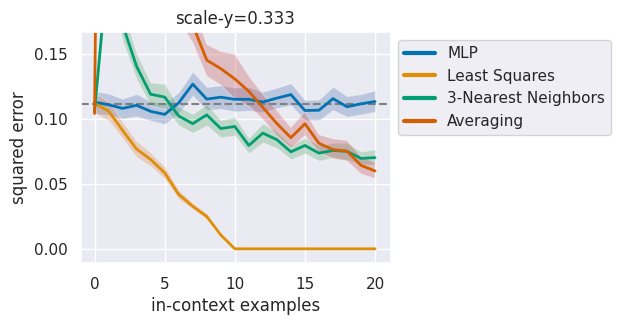

DEBUG: models ['MLP', 'Least Squares', '3-Nearest Neighbors', 'Averaging']
DEBUG: metrics {'MLP': {'mean': [0.24372339248657227, 0.25749945640563965, 0.23860905170440674, 0.21680808067321777, 0.27102372646331785, 0.25178894996643064, 0.25907258987426757, 0.23885772228240967, 0.251631498336792, 0.2747180461883545, 0.23525068759918213, 0.2675057649612427, 0.2589277744293213, 0.23314595222473145, 0.24404385089874267, 0.25179085731506345, 0.24851768016815184, 0.24466004371643066, 0.2510241985321045, 0.25906524658203123, 0.2453681468963623], 'std': [0.37591211795806884, 0.41495580673217775, 0.39906089305877684, 0.33859763145446775, 0.4558133125305176, 0.40764198303222654, 0.41559538841247556, 0.369591212272644, 0.3637351989746094, 0.48993120193481443, 0.3620218515396118, 0.4083867073059082, 0.3996743679046631, 0.352227520942688, 0.39597697257995607, 0.40302677154541017, 0.4339741230010986, 0.39211320877075195, 0.36675214767456055, 0.44247756004333494, 0.3970221757888794], 'bootstrap_low': [

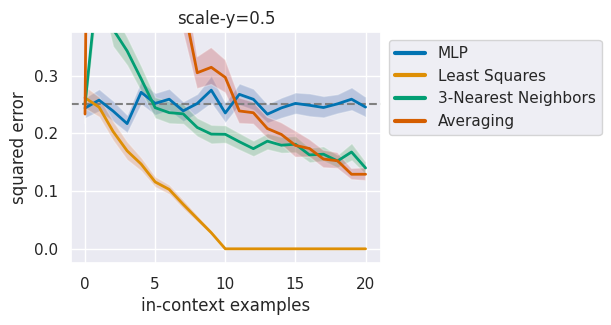

DEBUG: models ['MLP', 'Least Squares', '3-Nearest Neighbors', 'Averaging']
DEBUG: metrics {'MLP': {'mean': [4.066580581665039, 3.9135536193847655, 4.045357131958008, 3.8992740631103517, 3.947098159790039, 4.118032836914063, 3.7721477508544923, 4.1480663299560545, 4.334321212768555, 3.933623123168945, 3.9614830017089844, 3.900751495361328, 4.030659484863281, 4.245689010620117, 4.311797332763672, 3.962766647338867, 3.935944747924805, 4.144724655151367, 3.9766799926757814, 4.3299560546875, 4.047165298461914], 'std': [6.445823669433594, 5.921522903442383, 6.23132553100586, 6.448331451416015, 6.159261703491211, 6.184550094604492, 5.891878509521485, 6.865971374511719, 7.136371612548828, 6.4549720764160154, 6.178314971923828, 5.88089599609375, 6.641831970214843, 7.142852020263672, 7.158392333984375, 6.861093139648437, 6.140056228637695, 6.312795257568359, 5.977996444702148, 7.1370292663574215, 6.028755569458008], 'bootstrap_low': [3.7662452697753905, 3.6310260772705076, 3.7466663360595702, 3.

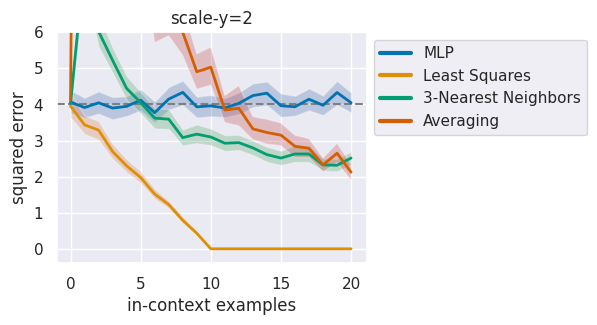

DEBUG: models ['MLP', 'Least Squares', '3-Nearest Neighbors', 'Averaging']
DEBUG: metrics {'MLP': {'mean': [8.906427001953125, 9.635501098632812, 9.083534240722656, 8.480193328857421, 9.261534118652344, 9.32659454345703, 8.900930023193359, 9.262762451171875, 9.614968872070312, 8.826547241210937, 8.635128021240234, 8.802716064453126, 8.29009552001953, 8.435308837890625, 10.092933654785156, 9.093235778808594, 8.31368179321289, 8.548822021484375, 8.766585540771484, 8.433750915527344, 9.345204162597657], 'std': [14.618121337890624, 16.49890594482422, 13.854437255859375, 12.77706298828125, 15.2652099609375, 15.739875793457031, 13.18995361328125, 14.774249267578124, 15.59512939453125, 13.832868957519532, 13.189991760253907, 15.006100463867188, 14.157670593261718, 14.155000305175781, 16.695797729492188, 15.789242553710938, 13.405221557617187, 13.076109313964844, 15.30962677001953, 13.581864929199218, 15.9011962890625], 'bootstrap_low': [8.28501205444336, 8.916163635253906, 8.48827667236328, 7

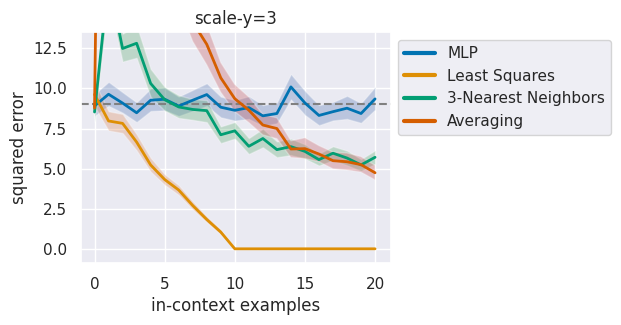

DEBUG: models ['MLP', 'Least Squares', '3-Nearest Neighbors', 'Averaging']
DEBUG: metrics {'MLP': {'mean': [1.0399620056152343, 1.0265477180480957, 0.9861007690429687, 0.9669344902038575, 1.0432165145874024, 0.9967107772827148, 0.9761783599853515, 1.035102653503418, 1.0455533027648927, 0.9072392463684082, 0.9427777290344238, 1.0142569541931152, 0.9677945137023926, 1.0263984680175782, 1.0306169509887695, 0.990561580657959, 0.951417064666748, 1.0780731201171876, 0.9493569374084473, 0.9615757942199707, 0.9308732032775879], 'std': [2.3803659439086915, 2.0313909530639647, 1.85450439453125, 2.001372146606445, 2.26918888092041, 2.008182716369629, 2.2372014999389647, 2.1268165588378904, 2.5109018325805663, 1.8280153274536133, 1.8924312591552734, 2.3764923095703123, 2.170604133605957, 2.3826065063476562, 1.9349716186523438, 2.049428367614746, 1.9713937759399414, 2.3757999420166014, 1.771160888671875, 1.8034284591674805, 1.72387752532959], 'bootstrap_low': [0.9335273742675781, 0.9360486984252929

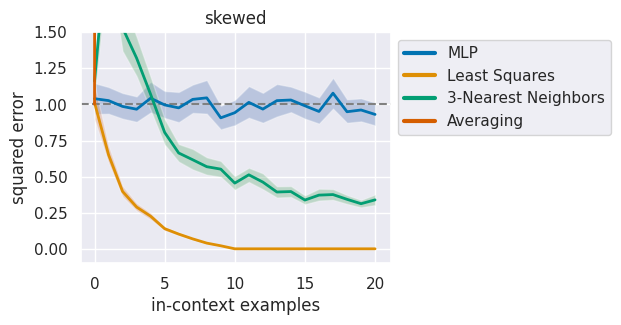

In [ ]:
# plot any OOD metrics
for name, metric in metrics.items():
    if name == "standard": continue
   
    if "scale" in name:
        scale = float(name.split("=")[-1])**2
    else:
        scale = 1.0

    trivial = 1.0 if "noisy" not in name else (1+1/n_dims)
    fig, ax = basic_plot(metric, models=models, trivial=trivial * scale)
    ax.set_title(name)
    
    if "ortho" in name:
        ax.set_xlim(-1, n_dims - 1)
    ax.set_ylim(-.1 * scale, 1.5 * scale)

    plt.show()

# Interactive setup

We will now directly load the model and measure its in-context learning ability on a batch of random inputs. (In the paper we average over multiple such batches to obtain better estimates.)

In [ ]:
from samplers import get_data_sampler
from tasks import get_task_sampler

In [ ]:
model, conf = get_model_from_run(run_path)

n_dims = conf.model.n_dims
batch_size = conf.training.batch_size

data_sampler = get_data_sampler(conf.training.data, n_dims)
task_sampler = get_task_sampler(
    conf.training.task,
    n_dims,
    batch_size,
    **conf.training.task_kwargs
)

RuntimeError: Error(s) in loading state_dict for MLPModel:
	Missing key(s) in state_dict: "_backbone.layers.0.weight", "_backbone.layers.0.bias", "_backbone.layers.2.weight", "_backbone.layers.2.bias", "_backbone.layers.3.weight", "_backbone.layers.3.bias", "_backbone.layers.5.weight", "_backbone.layers.5.bias", "_backbone.layers.6.weight", "_backbone.layers.6.bias", "_backbone.layers.8.weight", "_backbone.layers.8.bias", "_backbone.layers.9.weight", "_backbone.layers.9.bias", "_backbone.layers.11.weight", "_backbone.layers.11.bias", "_backbone.layers.12.weight", "_backbone.layers.12.bias", "_backbone.layers.14.weight", "_backbone.layers.14.bias", "_backbone.layers.15.weight", "_backbone.layers.15.bias", "_backbone.layers.17.weight", "_backbone.layers.17.bias", "_backbone.layers.18.weight", "_backbone.layers.18.bias", "_backbone.layers.20.weight", "_backbone.layers.20.bias", "_backbone.layers.21.weight", "_backbone.layers.21.bias", "_backbone.layers.23.weight", "_backbone.layers.23.bias", "_backbone.layers.24.weight", "_backbone.layers.24.bias", "_backbone.layers.26.weight", "_backbone.layers.26.bias", "_backbone.layers.27.weight", "_backbone.layers.27.bias", "_backbone.layers.29.weight", "_backbone.layers.29.bias", "_backbone.layers.30.weight", "_backbone.layers.30.bias", "_backbone.layers.32.weight", "_backbone.layers.32.bias", "_backbone.layers.33.weight", "_backbone.layers.33.bias", "_backbone.layers.35.weight", "_backbone.layers.35.bias". 
	Unexpected key(s) in state_dict: "_backbone.0.weight", "_backbone.0.bias", "_backbone.2.weight", "_backbone.2.bias", "_backbone.4.weight", "_backbone.4.bias", "_backbone.6.weight", "_backbone.6.bias", "_backbone.8.weight", "_backbone.8.bias", "_backbone.10.weight", "_backbone.10.bias", "_backbone.12.weight", "_backbone.12.bias", "_backbone.14.weight", "_backbone.14.bias", "_backbone.16.weight", "_backbone.16.bias", "_backbone.18.weight", "_backbone.18.bias", "_backbone.20.weight", "_backbone.20.bias", "_backbone.22.weight", "_backbone.22.bias", "_backbone.24.weight", "_backbone.24.bias". 

In [ ]:
task = task_sampler()
xs = data_sampler.sample_xs(b_size=batch_size, n_points=conf.training.curriculum.points.end)
ys = task.evaluate(xs)

In [ ]:
with torch.no_grad():

    pred = model(xs, ys)

In [ ]:
metric = task.get_metric()
loss = metric(pred, ys).numpy()

sparsity = conf.training.task_kwargs.sparsity if "sparsity" in conf.training.task_kwargs else None
baseline = {
    "linear_regression": n_dims,
    "sparse_linear_regression": sparsity,
    "relu_2nn_regression": n_dims,
    "decision_tree": 1,
}[conf.training.task]

plt.plot(loss.mean(axis=0), lw=2, label="Transformer")
plt.axhline(baseline, ls="--", color="gray", label="zero estimator")
plt.xlabel("# in-context examples")
plt.ylabel("squared error")
plt.legend()
plt.show()

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu!

As an exploration example, let's see how robust the model is to doubling all the inputs.

In [ ]:
xs2 = 2 * xs
ys2 = task.evaluate(xs2)
with torch.no_grad():
    pred2 = model(xs2, ys2)

Inside models TransformerModel:_combine
xs_b.shape: torch.Size([64, 41, 20])
xs_b: tensor([[[ 3.0321e-01,  1.9331e-01, -1.1683e+00,  ..., -8.9375e-01,
           6.6533e-01, -5.2920e-01],
         [ 2.5488e-01,  2.0204e+00,  1.6181e+00,  ..., -1.9764e+00,
          -1.0817e+00,  2.7811e+00],
         [-2.3508e+00,  1.8670e+00, -1.0455e+00,  ..., -6.0750e-01,
          -3.6292e-01,  1.4991e+00],
         ...,
         [-1.5782e+00, -8.1524e-01, -4.0761e+00,  ..., -2.7880e-01,
          -1.8817e-01, -8.9943e-01],
         [-2.5125e+00, -2.4655e+00,  5.1182e-01,  ..., -1.4248e+00,
          -5.4294e-01,  1.8800e+00],
         [-1.3735e+00,  2.6407e+00,  5.5036e+00,  ...,  2.1494e+00,
           2.4870e-02,  8.5600e-02]],

        [[-1.8506e+00, -7.8344e-01,  1.8867e+00,  ..., -2.6708e-01,
          -3.6353e-01,  1.1067e+00],
         [-2.6286e+00,  1.4204e-01, -8.9452e-01,  ...,  2.2724e+00,
           3.2088e+00,  3.2821e+00],
         [ 1.5352e+00,  9.6626e-01, -4.8648e+00,  ..., -2.301

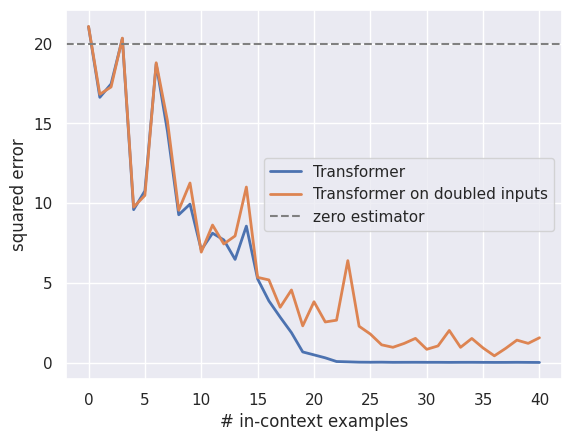

In [ ]:
loss2 = metric(pred2, ys2).numpy()

plt.plot(loss.mean(axis=0), lw=2, label="Transformer")
plt.plot(loss2.mean(axis=0) / 4, lw=2, label="Transformer on doubled inputs")
plt.axhline(baseline, ls="--", color="gray", label="zero estimator")
plt.xlabel("# in-context examples")
plt.ylabel("squared error")
plt.legend()
plt.show()

The error does increase, especially when the number of in-context examples exceeds the dimension, but the model is still relatively accurate.